EN3160 Assignment 2 on Fitting and Alignment 
M.W.R.Prabuddhika
200473E

1. In this question, using the knowledge on blob detection, i.e., using Laplacian of Gaussians and scale-space
extrema detection, we will detect and draw circles in the sunflower field image. Use the sunflower field
image provided:
im = cv.imread(’images/the_berry_farms_sunflower_field.jpeg’, cv.IMREAD_REDUCED_COLOR_4)
Report the parameters of the largest circles. Report the range of σ values used. You may not use the
cv2.HoughCircles function.

In [9]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
fig, ax = plt.subplots()
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)
plt.imshow(img, 'gray')

C:\Users\HP\AppData\Local\Temp\ipykernel_13252\3759347323.py:3: DeprecationWarning: Please use `gaussian_laplace` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_laplace


Largest Circle: Center=(0, 0), Radius=41.01219330881976
Range of Sigma Values Used: 1 to 29


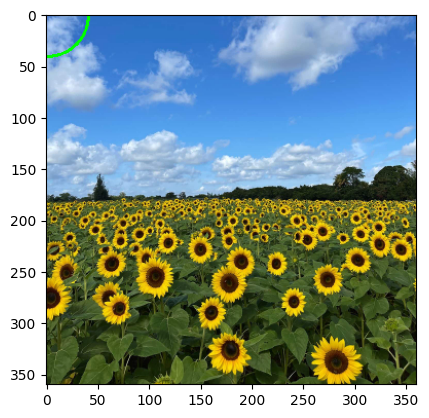

In [11]:
import cv2 as cv
import numpy as np
from scipy.ndimage.filters import gaussian_laplace

# Load the image
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Define the range of sigma values
sigma_range = np.arange(1, 30, 2)

max_radius = 0
max_sigma = 0
max_y = 0
max_x = 0

# Loop over the range of sigma values
for sigma in sigma_range:
    # Apply the Laplacian of Gaussian (LoG)
    log = gaussian_laplace(gray, sigma)

    # Normalize the LoG image
    log_norm = cv.normalize(log, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

    # Find local maxima
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(log_norm)

    # Check if this radius is the largest found so far
    if sigma * np.sqrt(2) > max_radius:
        max_radius = sigma * np.sqrt(2)
        max_sigma = sigma
        max_y, max_x = max_loc

# Draw the largest circle on the original image
cv.circle(im, (max_x, max_y), int(max_radius), (0, 255, 0), 2)

# Display the image with the detected circle
cv.imshow('Blob Detection', im)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots()
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)
plt.imshow(img, 'gray')

print(f'Largest Circle: Center=({max_x}, {max_y}), Radius={max_radius}')
print(f'Range of Sigma Values Used: {sigma_range[0]} to {sigma_range[-1]}')


In [13]:
import cv2 as cv
import numpy as np
from scipy.ndimage.filters import gaussian_laplace

# Load the image
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Define the range of sigma values
sigma_range = np.arange(1, 30, 2)

max_radius = 0
max_sigma = 0
max_y = 0
max_x = 0

# Loop over the range of sigma values
for sigma in sigma_range:
    # Apply the Laplacian of Gaussian (LoG)
    log = gaussian_laplace(gray, sigma)

    # Normalize the LoG image
    log_norm = cv.normalize(log, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

    # Find local maxima
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(log_norm)

    # Check if this radius is the largest found so far
    if sigma * np.sqrt(2) > max_radius:
        max_radius = sigma * np.sqrt(2)
        max_sigma = sigma
        max_y, max_x = max_loc

# Draw the largest circle on the original image
cv.circle(im, (max_x, max_y), int(max_radius), (0, 255, 0), 2)

# Display the image with the detected circle
cv.imshow('Blob Detection', im)
cv.waitKey(0)
cv.destroyAllWindows()

print(f'Largest Circle: Center=({max_x}, {max_y}), Radius={max_radius}')
print(f'Range of Sigma Values Used: {sigma_range[0]} to {sigma_range[-1]}')


C:\Users\HP\AppData\Local\Temp\ipykernel_13252\1414529262.py:3: DeprecationWarning: Please use `gaussian_laplace` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_laplace


Largest Circle: Center=(0, 0), Radius=41.01219330881976
Range of Sigma Values Used: 1 to 29


In [39]:
import cv2 as cv
import numpy as np

# Load the image
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Set up the SimpleBlobDetector with default parameters.
params = cv.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200

# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
im_with_keypoints = cv.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show blobs
cv.imshow("Keypoints", im_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()


In [40]:
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from orb import find_orb

im_bw = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
img_gray = rgb2gray(im_bw)
keypoints, descriptors = find_orb(img_gray)
blobs_log = blob_log(img_gray, max_sigma=30, num_sigma=10, threshold=.1)
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2) #normalizing and scaling parameter so that it matches the

blobs_dog = blob_dog(im_bw, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
blobs_doh = blob_doh(im_bw, max_sigma=30, threshold=.01)

fig, axes = plt.subplots( figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title('Laplacian of Gaussian')
ax[0].imshow(im_bw, cmap=plt.cm.gray)
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax[0].add_patch(c)
    ax[0].set_axis_off()

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'orb'

In [63]:
import cv2 as cv
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh

# Read the image
im_bw = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
img_gray = cv.cvtColor(im_bw, cv.COLOR_BGR2GRAY)

blobs_log = blob_log(img_gray, min_sigma=1, max_sigma=30, num_sigma=10, threshold=.1)
a = max(blobs_log[:, 2])
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
b = max(blobs_log[:, 2])
x0, y0, r = blobs_log[np.where(blobs_log[:, 2] == b)[0][0]]

# Compute blobs using LOG
blobs_log = blob_log(img_gray,min_sigma=1 ,max_sigma=30, num_sigma=10, threshold=.1)
a = max(blobs_log[:, 2])
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
b = max(blobs_log[:, 2])
x0, y0, r = blobs_log[np.where(blobs_log[:, 2] == b)[0][0]]

# Plot the results using matplotlib
fig, axes = plt.subplots(figsize=(10, 10), sharex=True, sharey=True)

axes.set_title('Laplacian of Gaussian')
axes.imshow(img_gray, cmap=plt.cm.gray)
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=3, fill=False)
    axes.add_patch(c)
    axes.set_axis_off()

print("The largest radius is", b, "pixels in radius.")
print("The center of the largest circle is at (", x0, ",", y0, ").")
plt.tight_layout()
plt.show()


The largest radius is 42.42640687119285 pixels in radius.
The center of the largest circle is at ( 0.0 , 234.0 ).


In [38]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('the_berry_farms_sunflower_field.jpeg')

# Convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define range of yellow color in HSV
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Threshold the HSV image to get only yellow colors
mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    # Get the area of the contour
    area = cv2.contourArea(contour)

    # Filter out small contours based on area
    if area > 500:
        # Get the minimum enclosing circle of the contour
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)

        # Draw the circle on the image
        cv2.circle(img, center, radius, (0, 255, 0), 2)

# Display the result
fig, axes = plt.subplots(figsize=(10, 10), sharex=True, sharey=True)
axes.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

sigma = 10
hw = 3*sigma

The parameters of the largest blob are: x=1439.0, y=1128.0, radius=42.42640687119285


error: OpenCV(4.8.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0x062af139::Set<3,4,-1>,struct cv::impl::A0x062af139::Set<0,2,5>,3>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


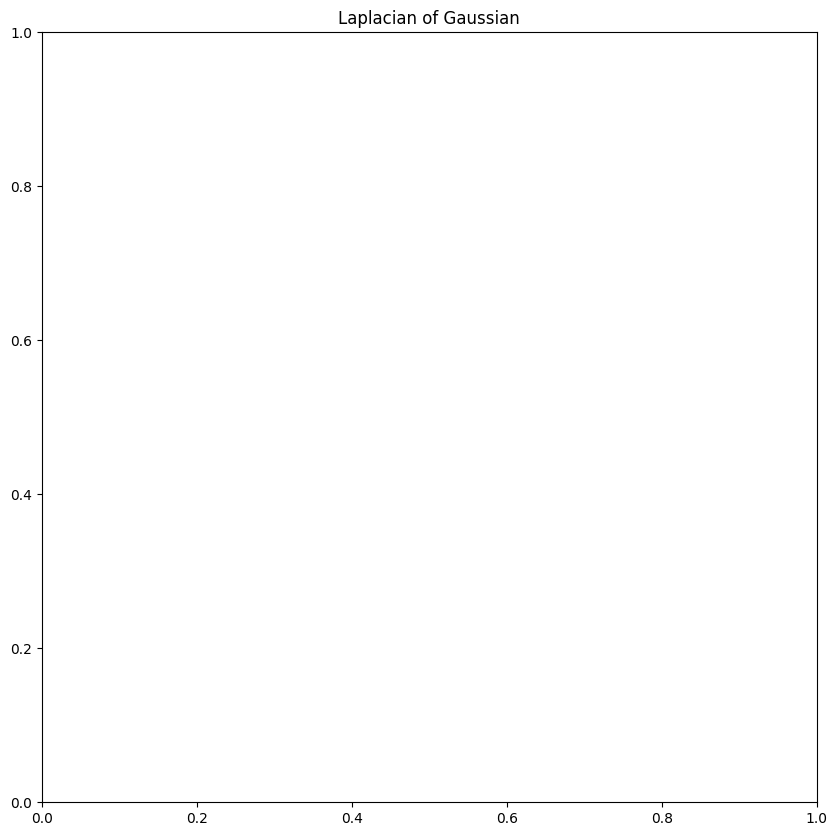

In [42]:
import cv2
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from skimage.feature import blob_log
from skimage.io import imread
from skimage.color import rgb2gray

# Load the image
img = imread('the_berry_farms_sunflower_field.jpeg', cv2.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
# Convert the image to grayscale if it's not already
if len(img.shape) == 3:
    img_gray = rgb2gray(img)
else:
    img_gray = img

# Convert the image to 8-bit unsigned integer
img_uint8 = cv2.convertScaleAbs(np.float32(img_gray)*255)

# Compute blobs using LOG
blobs_log = blob_log(img_gray, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

# Find the largest blob
largest_blob = max(blobs_log, key=lambda x: x[2])

# Print the parameters of the largest blob
print(f"The parameters of the largest blob are: x={largest_blob[0]}, y={largest_blob[1]}, radius={largest_blob[2]}")

# Plot the results using matplotlib
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Laplacian of Gaussian')

if len(img.shape) == 3:
    ax.imshow(img)
else:
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    for blob in blobs_log:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)
        ax.set_axis_off()

    # Plot the results using matplotlib
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_title('Laplacian of Gaussian')

    if len(img.shape) == 3:
        ax.imshow(img_uint8)
    else:
        ax.imshow(cv2.cvtColor(img_uint8, cv2.COLOR_GRAY2RGB))

    plt.tight_layout()



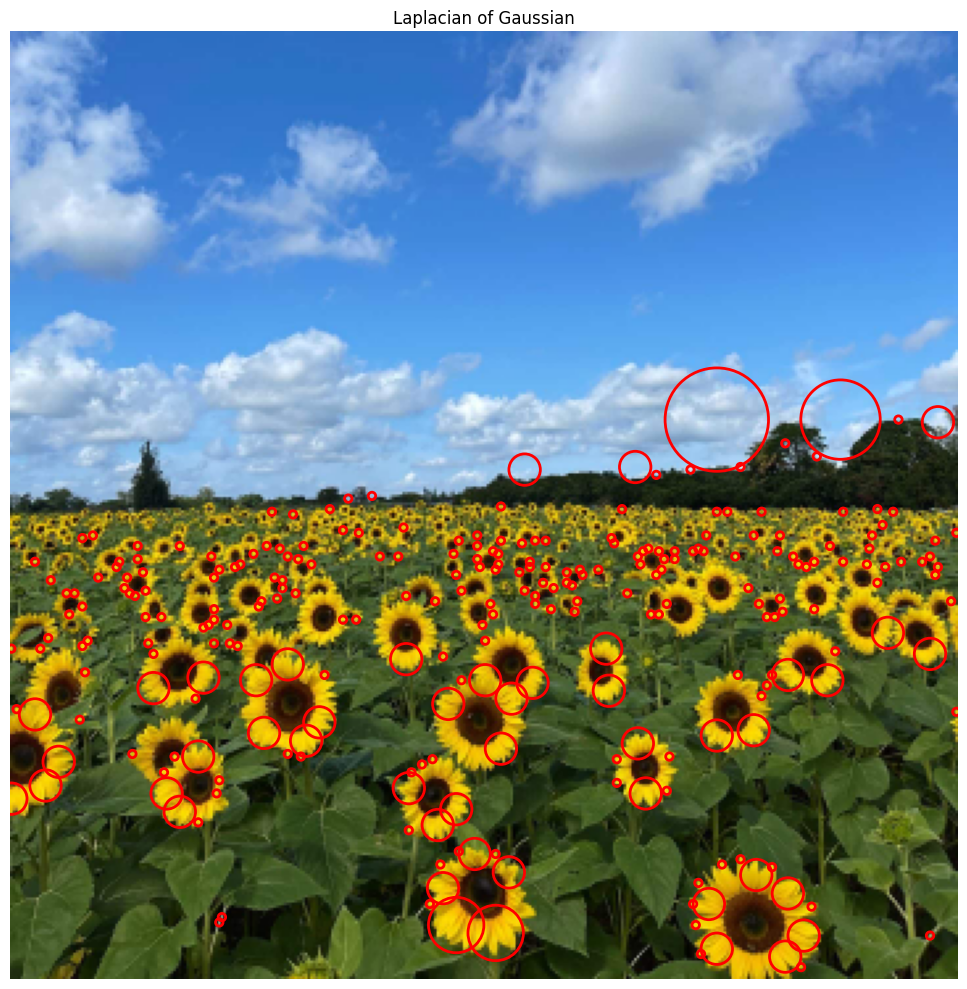

In [58]:
import cv2
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from skimage.feature import blob_log

# Read the image
im_bw = cv2.imread('the_berry_farms_sunflower_field.jpeg', cv2.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
img_gray = cv2.cvtColor(im_bw, cv2.COLOR_BGR2GRAY)

# Compute blobs using LOG
blobs_log = blob_log(img_gray, max_sigma=30, num_sigma=10, threshold=.18)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

# Plot the results using matplotlib
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Laplacian of Gaussian')
ax.imshow(cv2.cvtColor(im_bw, cv2.COLOR_BGR2RGB))
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)
    ax.set_axis_off()

plt.tight_layout()
plt.show()


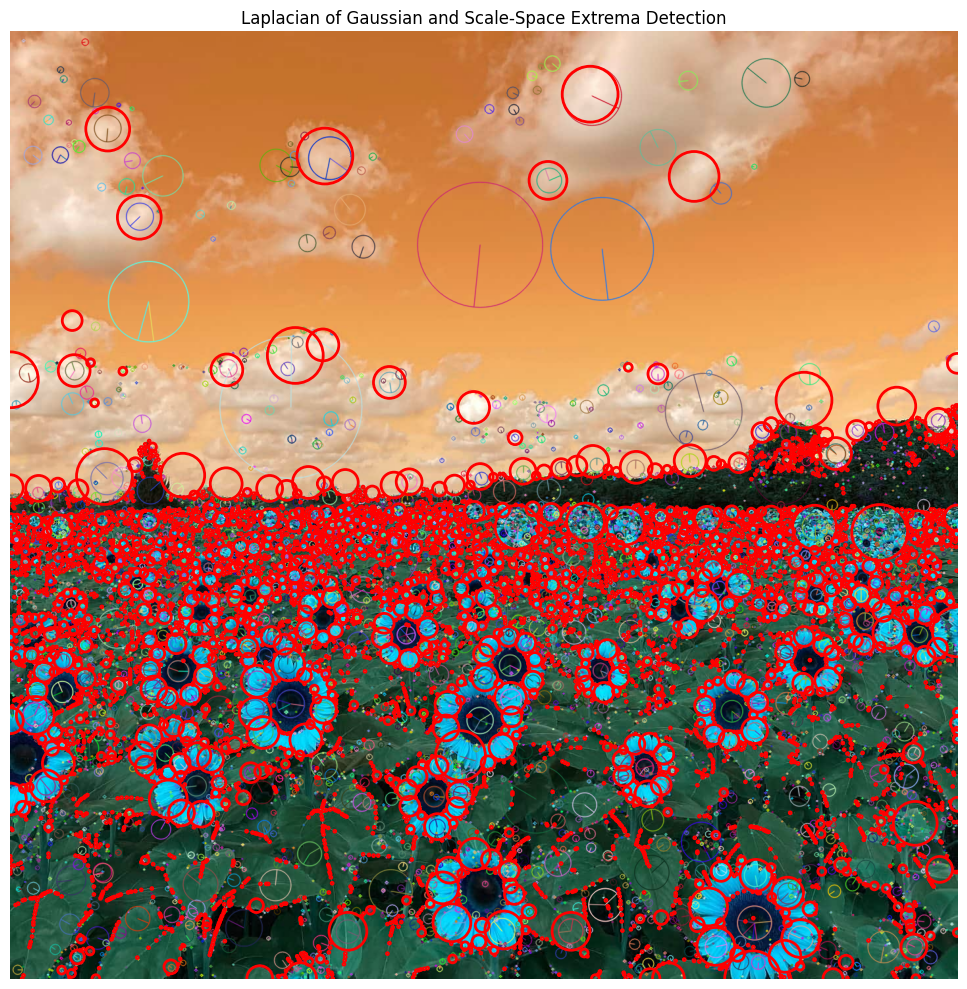

In [64]:
import cv2
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from skimage.feature import blob_log
from skimage.io import imread
from skimage.color import rgb2gray

# Load the image
img = imread('the_berry_farms_sunflower_field.jpeg')

# Convert the image to grayscale
img_gray = rgb2gray(img)

# Convert the floating point grayscale image to uint8
img_gray = (img_gray * 255).astype(np.uint8)

# Compute blobs using LOG
blobs_log = blob_log(img_gray, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints using SIFT detector
keypoints = sift.detect(img_gray, None)

# Draw keypoints on the image using SIFT
img_with_keypoints = cv2.drawKeypoints(img, keypoints, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert the BGR image to RGB
img_rgb = cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)

# Plot the results using matplotlib
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Laplacian of Gaussian and Scale-Space Extrema Detection')
ax.imshow(img_rgb)
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)
    ax.set_axis_off()

plt.tight_layout()
plt.show()


In [71]:
import cv2
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('the_berry_farms_sunflower_field.jpeg')

if img is None:
    print("Image not loaded")
else:
    print("Image loaded successfully")

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

# Apply Laplacian of Gaussian (LoG)
log = cv2.Laplacian(img_gray, cv2.CV_64F)

# Threshold the LoG image
_, log_thresh = cv2.threshold(log, 0.02, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded LoG image
contours, _ = cv2.findContours(log_thresh.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 1)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints using SIFT detector
keypoints = sift.detect(img_gray, None)

# Draw keypoints on the image using SIFT
img_with_keypoints = cv2.drawKeypoints(img, keypoints, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert the BGR image to RGB
img_rgb = cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)

# Plot the results using matplotlib
plt.imshow(img_rgb)
plt.show()


Image loaded successfully


In [94]:
import cv2 as cv

# Load the image
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Define a range of sigma (σ) values for the LoG filter
sigma_range = [1, 2, 3, 4, 5]

# Initialize a list to store detected circles
blobs = []

for sigma in sigma_range:
    # Apply Gaussian blur to the grayscale image with the current sigma value
    blurred = cv.GaussianBlur(im_gray, (0, 0), sigmaX=sigma, sigmaY=sigma)
    
    # Compute the Laplacian of Gaussian
    log = cv.Laplacian(blurred, cv.CV_32F)  # Convert to 32-bit floating-point
    
    # Find local maxima (extrema) in the Laplacian image
    min_dist = 30  # Minimum distance between blobs
    threshold = 0.01  # Threshold for blob intensity
    keypoints = cv.goodFeaturesToTrack(log, maxCorners=100, qualityLevel=threshold, minDistance=min_dist)
    
    # Convert keypoints to (x, y, radius) format and store them
    for point in keypoints:
        x, y = point[0]
        radius = sigma * 1.414  # Adjust for the scale
        blobs.append((x, y, radius))

# Find the largest circle(s) based on radius
if blobs:
    largest_blob = max(blobs, key=lambda x: x[2])
    largest_radius = largest_blob[2]
    print("Parameters of the largest circle:")
    print("Center (x, y):", (largest_blob[0], largest_blob[1]))
    print("Radius (σ scaled):", largest_radius)
else:
    print("No circles found.")


Parameters of the largest circle:
Center (x, y): (279.0, 260.0)
Radius (σ scaled): 7.069999999999999


In [43]:
import cv2 as cv
import numpy as np

# Load the image
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Define a range of sigma (σ) values for the LoG filter
sigma_range = [1, 2, 3, 4, 5]

# Initialize a list to store detected circles
blobs = []

for sigma in sigma_range:
    # Apply Gaussian blur to the grayscale image with the current sigma value
    blurred = cv.GaussianBlur(im_gray, (0, 0), sigmaX=sigma, sigmaY=sigma)
    
    # Compute the Laplacian of Gaussian
    log = cv.Laplacian(blurred, cv.CV_32F)  # Convert to 32-bit floating-point
    
    # Find local maxima (extrema) in the Laplacian image
    min_dist = 30  # Minimum distance between blobs
    threshold = 0.01  # Threshold for blob intensity
    keypoints = cv.goodFeaturesToTrack(log, maxCorners=100, qualityLevel=threshold, minDistance=min_dist)
    
    # Convert keypoints to (x, y, radius) format and store them
    for point in keypoints:
        x, y = point[0]
        radius = sigma * 1.414  # Adjust for the scale
        blobs.append((x, y, radius))

# Draw circles on the image
for blob in blobs:
    x, y, radius = blob
    cv.circle(im, (int(x), int(y)), int(radius), (0, 255, 0), 2)  # Draw a green circle

# Display the image with circles
cv.imshow('Image with Circles', im)
cv.waitKey(0)
cv.destroyAllWindows()


In [44]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Function to fit a line to two points (used for RANSAC)
def fit_line(points):
    x1, y1, x2, y2 = points
    a = y2 - y1
    b = x1 - x2
    d = x2 * y1 - x1 * y2
    norm = np.sqrt(a**2 + b**2)
    return a / norm, b / norm, d / norm

# Function to compute the distance from a point to a line
def point_to_line_distance(point, line_params):
    x, y = point
    a, b, d = line_params
    return np.abs(a * x + b * y + d)

# Function to fit a circle to three points (used for RANSAC)
# Function to fit a line to two points (used for RANSAC)
def fit_circle(points):
    x = points[:, 0]
    y = points[:, 1]
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    a = -m
    b = 1
    d = -c
    norm = np.sqrt(a**2 + b**2)
    return a / norm, b / norm, d / norm


# Generate noisy point set with a circle and a line
# (The provided code snippet is assumed to be used here)
N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))  # All points


# Initialize RANSAC parameters
num_iterations = 100
min_points_line = 2
min_points_circle = 3
line_inliers_threshold = 1.0  # Adjust as needed
circle_inliers_threshold = 1.0  # Adjust as needed

# Initialize variables to store the best models and inliers
best_line_model = None
best_line_inliers = []
best_circle_model = None
best_circle_inliers = []

# RANSAC for line fitting
for _ in range(num_iterations):
    # Randomly sample two points for line fitting
    sample_indices = np.random.choice(len(X), min_points_line, replace=False)
    sample_points = X[sample_indices]

    # Fit a line to the sample points
    line_params = fit_line(sample_points)

    # Calculate the distance to the line for all points
    distances = np.array([point_to_line_distance(point, line_params) for point in X])

    # Determine inliers for the line model
    inliers = np.where(distances < line_inliers_threshold)[0]

    # Update the best line model if necessary
    if len(inliers) > len(best_line_inliers):
        best_line_model = line_params
        best_line_inliers = inliers

# Subtract the consensus of the best line (remnant)
remnant_points = X[np.setdiff1d(range(len(X)), best_line_inliers)]

# RANSAC for circle fitting (using the remnant points)
for _ in range(num_iterations):
    # Randomly sample three points for circle fitting
    sample_indices = np.random.choice(len(remnant_points), min_points_circle, replace=False)
    sample_points = remnant_points[sample_indices]

    # Fit a circle to the sample points
    circle_params = fit_circle(sample_points)

    # Calculate the radial error for all points
    radial_errors = np.array([np.abs(np.sqrt((point[0] - circle_params[0])**2 + (point[1] - circle_params[1])**2) - circle_params[2]) for point in remnant_points])

    # Determine inliers for the circle model
    inliers = np.where(radial_errors < circle_inliers_threshold)[0]

    # Update the best circle model if necessary
    if len(inliers) > len(best_circle_inliers):
        best_circle_model = circle_params
        best_circle_inliers = inliers

# Extract the best-fit line and circle parameters
a, b, d = best_line_model
x0, y0, r = best_circle_model

# Visualization
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the point set
ax.scatter(X[:, 0], X[:, 1], label='All Points', color='b', alpha=0.5)

# Plot the estimated line
x_line = np.array([-15, 15])  # Adjust as needed for the plot
y_line = (-a / b) * x_line - (d / b)
ax.plot(x_line, y_line, label='Estimated Line', color='r')

# Plot the line inliers
line_inliers = X[best_line_inliers]
ax.scatter(line_inliers[:, 0], line_inliers[:, 1], label='Line Inliers (RANSAC)', color='y', alpha=0.7)

# Plot the best sample for line
ax.scatter(sample_line[:, 0], sample_line[:, 1], label='Best Sample for Line', color='m', marker='x', s=100)

# Plot the estimated circle
circle = plt.Circle((x0, y0), r, color='g', fill=False, label='Estimated Circle (RANSAC)')
ax.add_patch(circle)

# Plot the circle inliers
circle_inliers = remnant_points[best_circle_inliers]
ax.scatter(circle_inliers[:, 0], circle_inliers[:, 1], label='Circle Inliers (RANSAC)', color='k', alpha=0.7)

# Plot the best sample for circle
ax.scatter(sample_circle[:, 0], sample_circle[:, 1], label='Best Sample for Circle', color='c', marker='x', s=100)

# Plot the ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='orange', fill=False, label='Ground Truth Circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, 'o', color='orange', label='Ground Truth Circle Center')

# Plot the ground truth line
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='purple', label='Ground Truth Line')

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Line and Circle Estimation with RANSAC')
ax.legend()

# Show the plot
plt.grid()
plt.show()


ValueError: not enough values to unpack (expected 4, got 2)

my

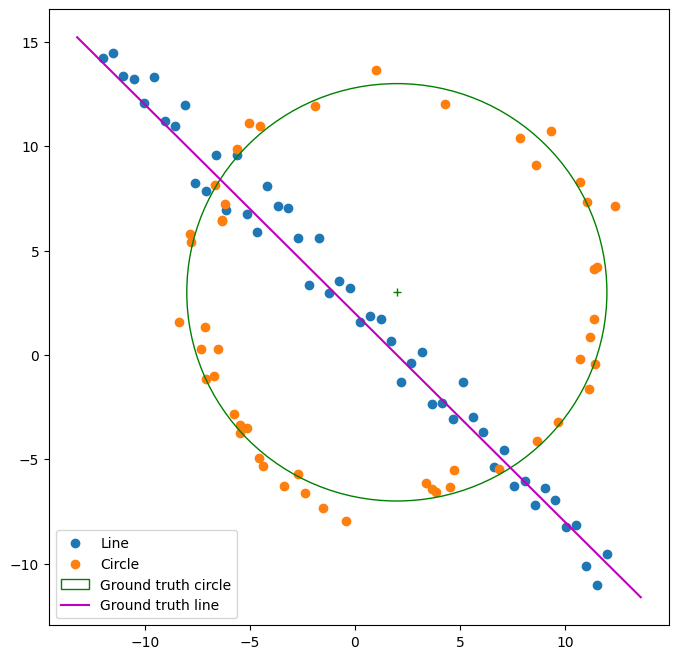

In [45]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x = x0_gt + (r + n) * np.cos(t)
y = y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))  # All points

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)

ax.plot(x0_gt, y0_gt, '+', color='g')

x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

plt.legend()
plt.show()


In [128]:
#Item 2: Total least squares line fitting with scicpy.optimize with RANSAC
import math
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x = x0_gt + (r + n) * np.cos(t)
y = y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))  # All points


N = X_line.shape[0]
X_ = X_line

def line_equation_from_points(x1, y1, x2, y2):
    # Calculate the direction vector (Δx, Δy)
    delta_x = x2 - x1
    delta_y = y2 - y1

    # Calculate the normalized vector (a, b)
    magnitude = math.sqrt(delta_x**2 + delta_y**2)
    a = delta_y / magnitude
    b = -delta_x / magnitude

    # Calculate d
    d = (a * x1) + (b * y1)

    # Return the line equation in the form ax + by = d
    return a, b, d

# RANSAC to fit a line
def line_tls(x, indices):
    a, b, d = x[0], x[1], x[2]
    return np.sum(np.square(a*X_[indices,0] + b*X_[indices,1] - d))

# Constraint
def g(x):
    return x[0]**2 + x[1]**2 - 1

cons = ({'type': 'eq', 'fun': g})

# Computing the consensus (inliers)
def consensus_line(X, x, t):
    a, b, d = x[0], x[1], x[2]
    error = np.absolute(a*X_[:,0] + b*X_[:,1] - d)
    return error < t
    
t = 1.   # Threshold value to determine data points that are fit well by model.
d = 0.4*N   # Number of close data points required to assert that a model fits well to data.
s = 2       # Minimum number of data points required to estimate model parameters.

inliers_line = []        # Indinces of the inliers
max_iterations = 50
iteration = 0
best_model_line = []     # Best model normal (a, b) and distance from origin d
best_error = np.inf
best_sample_line = []    # Three-point sample leading to the best model computation
res_only_with_sample = [] # Result (a, b, d) only using the best sample
best_inliers_line = []   # Inliers of the model computed form the best sample

while iteration < max_iterations:   
    indices = np.random.randint(0, N, s) # A sample of three (s) points selected at random
    x0 = np.array([1, 1, 0]) # Initial estimate
    res = minimize(fun = line_tls, args = indices, x0 = x0, tol= 1e-6, constraints=cons, options={'disp': True})
    inliers_line = consensus_line(X_, res.x, t) # Computing the inliers
    print('rex.x: ', res.x)    
    print('Iteration = ', iteration, '. No. inliners = ', inliers_line.sum())
    if inliers_line.sum() > d:
        x0 = res.x
        # Computing the new model using the inliers
        res = minimize(fun = line_tls, args = inliers_line, x0 = x0, tol= 1e-6, constraints=cons, options={'disp': True})
        print(res.x, res.fun)
        if res.fun < best_error:
            print('A better model found ... ', res.x, res.fun)
            best_model_line = res.x
            best_eror = res.fun
            best_sample_line = X_[indices,:]
            res_only_with_sample = x0
            best_inliers_line = inliers_line

    iteration += 1

print('Best line model', best_model_line)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')
ax.scatter(X_line[:,0],X_line[:,1], label='All points')
ax.scatter(X_[best_inliers_line,0],X_[best_inliers_line,1], color='y', label='Inliers')
ax.scatter(best_sample_line[:,0],best_sample_line[:,1], color='r', label='Best sample')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_model_line[1]*x_ + best_model_line[2])/best_model_line[1]
plt.plot(x_, y_,  label='RANSAC line')
x_ = np.array([x_min, x_max])
y_ = m*x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
plt.legend()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0868009308975884e-10
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
rex.x:  [0.73374795 0.67942178 1.26682119]
Iteration =  0 . No. inliners =  38
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8.578734841971322
            Iterations: 4
            Function evaluations: 22
            Gradient evaluations: 4
[0.72719201 0.6864341  1.47979613] 8.578734841971322
A better model found ...  [0.72719201 0.6864341  1.47979613] 8.578734841971322
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.9120869363505546e-11
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 7
rex.x:  [0.85776249 0.51404623 3.7463851 ]
Iteration =  1 . No. inliners =  14
Optimization terminated successfully    (Exit mode 0)
            Current funct

In [42]:
#Item 2: Total least squares line fitting with scicpy.optimize with RANSAC
import math
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x = x0_gt + (r + n) * np.cos(t)
y = y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))  # All points


N = X_line.shape[0]
X_ = X_line

def line_equation_from_points(x1, y1, x2, y2):
    # Calculate the direction vector (Δx, Δy)
    delta_x = x2 - x1
    delta_y = y2 - y1

    # Calculate the normalized vector (a, b)
    magnitude = math.sqrt(delta_x**2 + delta_y**2)
    a = delta_y / magnitude
    b = -delta_x / magnitude

    # Calculate d
    d = (a * x1) + (b * y1)

    # Return the line equation in the form ax + by = d
    return a, b, d

# RANSAC to fit a line
def line_tls(x, indices):
    a, b, d = x[0], x[1], x[2]
    return np.sum(np.square(a*X_[indices,0] + b*X_[indices,1] - d))

# Constraint
def g(x):
    return x[0]**2 + x[1]**2 - 1

cons = ({'type': 'eq', 'fun': g})

# Computing the consensus (inliers)
def consensus_line(X, x, t):
    a, b, d = x[0], x[1], x[2]
    error = np.absolute(a*X_[:,0] + b*X_[:,1] - d)
    return error < t
    
t = 1.   # Threshold value to determine data points that are fit well by model.
d = 0.4*N   # Number of close data points required to assert that a model fits well to data.
s = 2       # Minimum number of data points required to estimate model parameters.

inliers_line = []        # Indinces of the inliers
max_iterations = 50
iteration = 0
best_model_line = []     # Best model normal (a, b) and distance from origin d
best_error = np.inf
best_sample_line = []    # Three-point sample leading to the best model computation
res_only_with_sample = [] # Result (a, b, d) only using the best sample
best_inliers_line = []   # Inliers of the model computed form the best sample

while iteration < max_iterations:   
    indices = np.random.randint(0, N, s) # A sample of three (s) points selected at random
    x0 = np.array([1, 1, 0]) # Initial estimate
    res = minimize(fun = line_tls, args = indices, x0 = x0, tol= 1e-6, constraints=cons, options={'disp': True})
    inliers_line = consensus_line(X_, res.x, t) # Computing the inliers
    print('rex.x: ', res.x)    
    print('Iteration = ', iteration, '. No. inliners = ', inliers_line.sum())
    if inliers_line.sum() > d:
        x0 = res.x
        # Computing the new model using the inliers
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')
ax.scatter(X_line[:, 0], X_line[:, 1], label='All points')
ax.scatter(X_[best_inliers_line, 0], X_[best_inliers_line, 1], color='y', label='Inliers')
ax.scatter(best_sample_line[:, 0], best_sample_line[:, 1], color='r', label='Best sample')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_model_line[1] * x_ + best_model_line[2]) / best_model_line[1]
plt.plot(x_, y_, label='RANSAC line')
x_ = np.array([x_min, x_max])
y_ = m*x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
plt.scatter(remnant_data[:, 0], remnant_data[:, 1], color='c', label='Remnant')
x_circle = best_model_circle[0]
y_circle = best_model_circle[1]
radius_circle = best_model_circle[2]
circle_estimated = plt.Circle((x_circle, y_circle), radius_circle, color='b', fill=False, label='Estimated Circle')
ax.add_patch(circle_estimated)
plt.legend()
plt.show()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0868009308975884e-10
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
rex.x:  [0.73374795 0.67942178 1.26682119]
Iteration =  0 . No. inliners =  38
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8.578734841971322
            Iterations: 4
            Function evaluations: 22
            Gradient evaluations: 4
[0.72719201 0.6864341  1.47979613] 8.578734841971322
A better model found ...  [0.72719201 0.6864341  1.47979613] 8.578734841971322
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.9120869363505546e-11
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 7
rex.x:  [0.85776249 0.51404623 3.7463851 ]
Iteration =  1 . No. inliners =  14
Optimization terminated successfully    (Exit mode 0)
            Current funct

IndexError: list index out of range

indices [25  3]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0868009308975884e-10
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
rex.x:  [0.73374795 0.67942178 1.26682119]
Iteration =  0 . No. inliners =  38
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8.578734841971322
            Iterations: 4
            Function evaluations: 22
            Gradient evaluations: 4
[0.72719201 0.6864341  1.47979613] 8.578734841971322
A better model found ...  [0.72719201 0.6864341  1.47979613] 8.578734841971322
best_sample_line [[  0.24489796   1.60009195]
 [-10.53061224  13.23718541]]
indices [39 35]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.9120869363505546e-11
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 7
rex.x:  [0.85776249 0.51404623 3.7463851 ]
Iterati

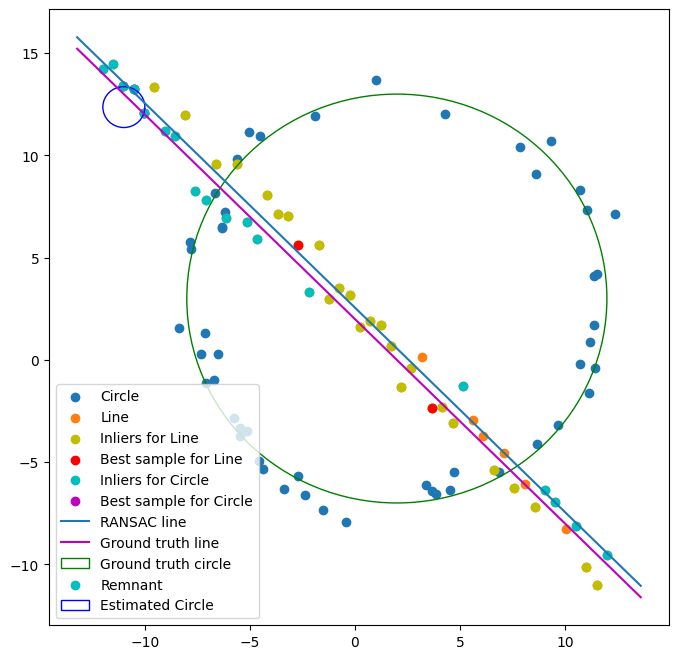

In [119]:
import math
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x = x0_gt + (r + n) * np.cos(t)
y = y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))  # All points


N = X_line.shape[0]
X_ = X_line

def line_equation_from_points(x1, y1, x2, y2):
    # Calculate the direction vector (Δx, Δy)
    delta_x = x2 - x1
    delta_y = y2 - y1

    # Calculate the normalized vector (a, b)
    magnitude = math.sqrt(delta_x**2 + delta_y**2)
    a = delta_y / magnitude
    b = -delta_x / magnitude

    # Calculate d
    d = (a * x1) + (b * y1)

    # Return the line equation in the form ax + by = d
    return a, b, d

# RANSAC to fit a line
def line_tls(x, indices):
    a, b, d = x[0], x[1], x[2]
    return np.sum(np.square(a*X_[indices,0] + b*X_[indices,1] - d))

# Constraint
def g(x):
    return x[0]**2 + x[1]**2 - 1

cons = ({'type': 'eq', 'fun': g})

# Computing the consensus (inliers)
def consensus_line(X, x, t):
    a, b, d_ = x[0], x[1], x[2]
    error = np.absolute(a*X_[:,0] + b*X_[:,1] - d_)
    return error < t
    
t = 1 # Threshold value to determine data points that are fit well by model.
d = 0.4*N   # Number of close data points required to assert that a model fits well to data.
s = 2       # Minimum number of data points required to estimate model parameters.

inliers_line = []        # Indinces of the inliers
max_iterations = 50
iteration = 0
best_model_line = []     # Best model normal (a, b) and distance from origin d
best_error = np.inf
best_sample_line = []    # Three-point sample leading to the best model computation
res_only_with_sample = [] # Result (a, b, d) only using the best sample
best_inliers_line = []   # Inliers of the model computed form the best sample

while iteration < max_iterations:   
    indices = np.random.randint(0, N, s) # A sample of three (s) points selected at random
    print("indices", indices)
    x0 = np.array([1, 1, 0]) # Initial estimate
    res = minimize(fun = line_tls, args = indices, x0 = x0, tol= 1e-6, constraints=cons, options={'disp': True})
    inliers_line = consensus_line(X_, res.x, t) # Computing the inliers
    print('rex.x: ', res.x)    
    print('Iteration = ', iteration, '. No. inliners = ', inliers_line.sum())
    if inliers_line.sum() > d:
        x0 = res.x
        # Computing the new model using the inliers
        res = minimize(fun = line_tls, args = inliers_line, x0 = x0, tol= 1e-6, constraints=cons, options={'disp': True})
        print(res.x, res.fun)
        if res.fun < best_error:
            print('A better model found ... ', res.x, res.fun)
            best_model_line = res.x
            best_error = res.fun
            best_sample_line = X_[indices,:]
            print("best_sample_line", best_sample_line)
            res_only_with_sample = x0
            best_inliers_line = inliers_line

    iteration += 1

print('Best line model', best_model_line)
# Compute the consensus (inliers) for the best line model
inliers_line = consensus_line(X_, best_model_line, t)

# Subtract the inliers to obtain the remnant data
remnant_data = X_[~inliers_line]

# Define a function to fit a circle using RANSAC
def circle_ransac(x, indices):
    x0, y0, r = x[0], x[1], x[2]
    return np.sum(np.square((remnant_data[indices, 0] - x0) ** 2 + (remnant_data[indices, 1] - y0) ** 2 - r ** 2))

# Define a constraint function for circle radius
def g_circle(x):
    return x[2] - 1

# Computing the consensus (inliers circle)
def consensus_circle(X, x, t):
    error = np.square((X[:, 0] - x[0]) ** 2
                                + (X[:, 1] - x[1]) ** 2 - x[2] ** 2)
    return error < t

circle_cons = ({'type': 'eq', 'fun': g_circle})

# Set RANSAC parameters for circle fitting
t_circle = 6   # Threshold for radial error
d_circle = 0.16 * len(remnant_data)  # Minimum number of points in the consensus
s_circle = 3  # Minimum number of points to estimate the circle parameters
print("HI",len(remnant_data))
best_model_circle = []  # Best circle parameters (x0, y0, r)
best_error_circle = np.inf
best_inliers_circle = []  # Inliers of the circle model
best_sample_circle = []  # Three-point sample leading to the best model computation
iteration_circle = 0
max_iterations_circle = 50
x0_circle = np.array([0, 0, 1])  # Initial estimate (x0, y0, r)

while iteration_circle < max_iterations_circle:
    indices_circle = np.random.choice(len(remnant_data), s_circle, replace=False)
    print("indices", indices_circle)
    x0_circle = np.array([0, 0, 1])  # Initial estimate (x0, y0, r)
    res_circle = minimize(fun=circle_ransac, args=indices_circle, x0=x0_circle, tol=1e-6,
                           constraints= circle_cons, options={'disp': True})
    #inliers_circle = [np.square((remnant_data[:, 0] - res_circle.x[0]) ** 2
     #                           + (remnant_data[:, 1] - res_circle.x[1]) ** 2 - res_circle.x[2] ** 2)
      #                < t_circle]
    inliers_circle = consensus_circle(remnant_data, res_circle.x, t_circle)
    print('Iteration =', iteration_circle, '. No. inliers =', inliers_circle.sum())
    
    if inliers_circle.sum() > d_circle:
        x0_circle = res_circle.x
        # Computing the new model using the inliers
        res_circle = minimize(fun = circle_ransac, args = inliers_circle, x0 = x0_circle, tol= 1e-6, constraints= circle_cons, options={'disp': True})
        print(res_circle.x, res_circle.fun)

        if res_circle.fun < best_error_circle:
            print('A better circle model found ...', res_circle.x, res_circle.fun)
            print('Best model###################################', best_model_circle)
            best_model_circle = res_circle.x
            best_error_circle = res_circle.fun
            best_sample_circle = remnant_data[indices_circle,:]
            print("best_sample_circle", best_sample_circle)
            best_inliers_circle = list(inliers_circle)
    
    iteration_circle += 1

print('Best circle model', best_model_circle)

# Plot the circle and the remnant points
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_[best_inliers_line, 0], X_[best_inliers_line, 1], color='y', label='Inliers for Line')
ax.scatter(best_sample_line[:, 0], best_sample_line[:, 1], color='r', label='Best sample for Line')
ax.scatter(remnant_data[best_inliers_circle, 0], remnant_data[best_inliers_circle, 1], color='c', label='Inliers for Circle')
ax.scatter(best_sample_circle[:, 0], best_sample_circle[:, 1], color='m', label='Best sample for Circle')   
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_model_line[1] * x_ + best_model_line[2]) / best_model_line[1]
plt.plot(x_, y_, label='RANSAC line')
x_ = np.array([x_min, x_max])
y_ = m*x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
plt.scatter(remnant_data[:, 0], remnant_data[:, 1], color='c', label='Remnant')
x_circle = best_model_circle[0]
y_circle = best_model_circle[1]
radius_circle = best_model_circle[2]
circle_estimated = plt.Circle((x_circle, y_circle), radius_circle, color='b', fill=False, label='Estimated Circle')
ax.add_patch(circle_estimated)
plt.legend()
plt.show()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.123323560816004e-09
            Iterations: 11
            Function evaluations: 49
            Gradient evaluations: 11
rex.x:  [ 0.99730237 -0.07340325 -4.18874127]
Iteration =  0 . No. inliners =  8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0786208103638998e-11
            Iterations: 8
            Function evaluations: 39
            Gradient evaluations: 8
rex.x:  [ 0.9414585  -0.33712891 -3.64579168]
Iteration =  1 . No. inliners =  8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5.975350980935442e-09
            Iterations: 9
            Function evaluations: 40
            Gradient evaluations: 9
rex.x:  [ 9.99992770e-01 -3.80847147e-03 -6.69681687e+00]
Iteration =  2 . No. inliners =  14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0867735142075082

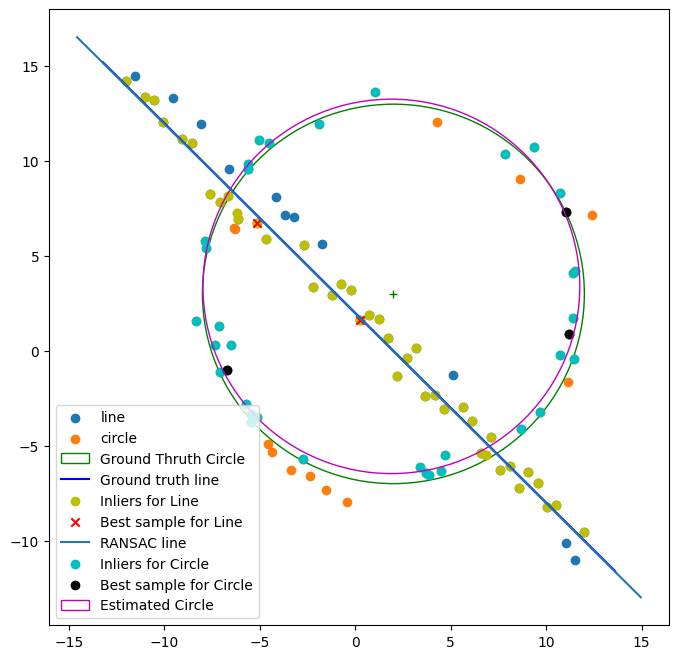

In [38]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
import tikzplotlib

np.random.seed(0)

N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x = x0_gt + (r + n) * np.cos(t)
y = y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))  # All points
fig , ax = plt.subplots (1 ,1 , figsize=(8 ,8))
ax . scatter( X_line [ : , 0 ] , X_line [ : , 1 ] , label= 'line')
ax.scatter( X_circ [ : , 0 ] , X_circ [ : , 1 ] , label = 'circle')
circle_get = plt.Circle( ( x0_gt , y0_gt ) , r , color = 'g', fill=False , label='Ground Thruth Circle' )
ax . add_patch (circle_get)
ax . plot ( ( x0_gt ) , ( y0_gt ) ,'+', color = 'g' )
x_min , x_max = ax . get_xlim ( )
x_ = np . array ( [ x_min , x_max ] )
y_ = m*x_ + b
plt.plot( x_ , y_ ,color = 'b' , label= 'Ground truth line' )
plt.legend()

N = X.shape[0]
X_ = X

def line_equation_from_points(x1, y1, x2, y2):
    # Calculate the direction vector (Δx, Δy)
    delta_x = x2 - x1
    delta_y = y2 - y1

    # Calculate the normalized vector (a, b)
    magnitude = math.sqrt(delta_x**2 + delta_y**2)
    a = delta_y / magnitude
    b = -delta_x / magnitude

    # Calculate d
    d = (a * x1) + (b * y1)

    # Return the line equation in the form ax + by = d
    return a, b, d

# RANSAC to fit a line
def line_tls(x, line_indices):
    a, b, d = x[0], x[1], x[2]
    return np.sum(np.square(a*X_[line_indices,0] + b*X_[line_indices,1] - d))

# Constraint
def g(x):
    return x[0]**2 + x[1]**2 - 1

cons = ({'type': 'eq', 'fun': g})

# Computing the consensus (inliers)
def consensus_line(X_, x, t):
    a, b, d = x[0], x[1], x[2]
    error = np.abs(a*X_[:,0] + b*X_[:,1] - d)
    return error < t
    
t = 1 # Threshold value to determine data points that are fit well by model.
d = 0.4*N   # Number of close data points required to assert that a model fits well to data.
s = 2       # Minimum number of data points required to estimate model parameters.

inliers_line = []        # Indinces of the inliers
max_iterations = 100
iteration = 0
best_model_line = []     # Best model normal (a, b) and distance from origin d
best_error = np.inf
best_sample_line = []    # Three-point sample leading to the best model computation
res_only_with_sample = [] # Result (a, b, d) only using the best sample
best_inliers_line = []   # Inliers of the model computed form the best sample

while iteration < max_iterations:   
    line_indices = np.random.randint(0, N, s) # A sample of three (s) points selected at random
    x0 = np.array([1, 1, 0]) # Initial estimate
    res = minimize(fun = line_tls, args = line_indices, x0 = x0, tol= 1e-6, constraints=cons, options={'disp': True})
    inliers_line = consensus_line(X_, res.x, t) # Computing the inliers
    print('rex.x: ', res.x)    
    print('Iteration = ', iteration, '. No. inliners = ', inliers_line.sum())
    if inliers_line.sum() > d:
        x0 = res.x
        # Computing the new model using the inliers
        res = minimize(fun = line_tls, args = inliers_line, x0 = x0, tol= 1e-6, constraints=cons, options={'disp': True})
        print(res.x, res.fun)
        if res.fun < best_error:
            print('A better model found ... ', res.x, res.fun)
            best_model_line = res.x
            best_error = res.fun
            best_sample_line = X_[line_indices,:]
            print("best_sample_line", best_sample_line)
            res_only_with_sample = x0
            best_inliers_line = inliers_line

    iteration += 1

print('Best line model', best_model_line)

ax.scatter(X_[best_inliers_line, 0], X_[best_inliers_line, 1], color='y', label='Inliers for Line')
ax.scatter(best_sample_line[:, 0], best_sample_line[:, 1],marker='x', color='r', label='Best sample for Line')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_model_line[1]*x_ + best_model_line[2])/best_model_line[1]
plt.plot(x_, y_,  label='RANSAC line')
ax.legend()


# Compute the consensus (inliers) for the best line model
inliers_line = consensus_line(X_, best_model_line, t)

# Subtract the inliers to obtain the remnant data

remnant_data = X_[~inliers_line]
print("remnant_data",remnant_data)

# Define a function to fit a circle using RANSAC
def circle_ransac(x, circle_indices):
    x0, y0, r = x[0], x[1], x[2]
    x1, y1 = remnant_data[circle_indices].T
    return np.sum((np.sqrt((x1 - x0)**2 + (y1 - y0)**2) - r)**2)

# Define a constraint function for circle radius
def g_circle(x):
    return (x[0]-x0_gt)**2 + (x[1]-y0_gt)**2 - r**2

# Computing the consensus (inliers circle)
def consensus_circle(X, x, t):
    error = np.abs(np.linalg.norm(X - x[:2], axis=1) - x[2])
    #error = np.sqrt(np.absolute((X[:, 0] - x[0]) ** 2
     #                           + (X[:, 1] - x[1]) ** 2 - x[2] ** 2))
    return error < t

circle_cons = {'type': 'eq', 'fun': g_circle}

# Set RANSAC parameters for circle fitting
t_circle = 1.0  # Threshold for radial error
d_circle =  35#.4* len(remnant_data)  # Minimum number of points in the consensus
s_circle = 3 # Minimum number of points to estimate the circle parameters

best_model_circle = []  # Best circle parameters (x0, y0, r)
best_error_circle = np.inf
best_inliers_circle = []  # Inliers of the circle model
best_sample_circle = []  # Three-point sample leading to the best model computation
iteration_circle = 0
max_iterations_circle = 100

while iteration_circle < max_iterations_circle:
    indices_circle = np.random.randint(0,len(remnant_data), s_circle)
    x0_circle = np.array([0, 0, 0])  # Initial estimate (x0, y0, r)
    res_circle = minimize(fun=circle_ransac, args=indices_circle, x0=x0_circle, tol=1e-6)
    inliers_circle = consensus_circle(remnant_data, res_circle.x, t_circle)
    print('Iteration =', iteration_circle, '. No. inliers =', inliers_circle.sum())
    
    if inliers_circle.sum() > d_circle:
        x0_circle = res_circle.x
        # Computing the new model using the inliers
        res_circle = minimize(fun = circle_ransac, args = inliers_circle, x0 = x0_circle, tol= 1e-6)
        print(res_circle.x, res_circle.fun)

        if res_circle.fun < best_error_circle:
            print('A better circle model found ...', res_circle.x, res_circle.fun)
            print('Best model', best_model_circle)
            best_model_circle = res_circle.x
            best_error_circle = res_circle.fun
            best_circle_indices = indices_circle
            print("best_sample_circle", best_sample_circle)
            best_inliers_circle = inliers_circle
    
    iteration_circle += 1

print('Best circle model', best_model_circle)


ax.scatter(remnant_data[best_inliers_circle, 0], remnant_data[best_inliers_circle, 1], color='c', label='Inliers for Circle')
ax.scatter(remnant_data[best_circle_indices,0], remnant_data[best_circle_indices,1], color='k', label='Best sample for Circle')

x_circle = best_model_circle[0]
y_circle = best_model_circle[1]
radius_circle = best_model_circle[2]
circle_estimated = plt.Circle((x_circle, y_circle), radius_circle, color='m', fill=False, label='Estimated Circle')
ax.add_patch(circle_estimated)
ax.legend()

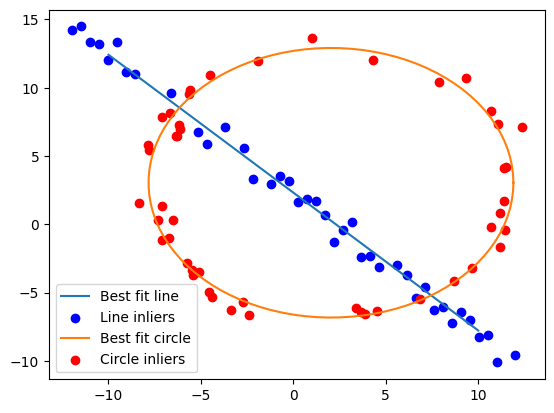

In [104]:
import numpy as np
from scipy.optimize import minimize

def fit_line(points):
    # Define the error function for a line
    def error(params):
        a, b, d = params
        distances = np.abs(a * points[:, 0] + b * points[:, 1] - d) / np.sqrt(a**2 + b**2)
        return np.sum(distances)

    # Initial guess
    params0 = [1, 1, 1]
    # Minimize the error function
    res = minimize(error, params0)
    return res.x

def fit_circle(points):
    # Define the error function for a circle
    def error(params):
        h, k, r = params
        distances = np.sqrt((points[:, 0] - h)**2 + (points[:, 1] - k)**2) - r
        return np.sum(distances**2)

    # Initial guess
    params0 = [0, 0, 1]
    # Minimize the error function
    res = minimize(error, params0)
    return res.x

def ransac(points, fit_model, num_samples, threshold):
    best_params = None
    best_error = np.inf
    best_inliers = None

    for _ in range(num_samples):
        # Select random subset of points
        subset = points[np.random.choice(points.shape[0], 2, replace=False), :]
        # Fit model to subset
        params = fit_model(subset)
        # Classify inliers and outliers
        if fit_model == fit_line:
            a, b, d = params
            distances = np.abs(a * points[:, 0] + b * points[:, 1] - d) / np.sqrt(a**2 + b**2)
        else:  # fit_model == fit_circle
            h, k, r = params
            distances = np.abs(np.sqrt((points[:, 0] - h)**2 + (points[:, 1] - k)**2) - r)
        inliers = points[distances < threshold]
        # If the number of inliers is high enough,
        if len(inliers) > len(points)*.4:  # This is just an example condition
            # Refit model to inliers
            params = fit_model(inliers)
            # Compute error of this model
            error = np.sum(distances**2)
            if error < best_error:
                best_params = params
                best_error = error
                best_inliers = inliers

    return best_params, best_inliers

# Your data here...

np.random.seed(0)

N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x = x0_gt + (r + n) * np.cos(t)
y = y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))  # All points
points_line = X_line
points_circle = X_circ

# RANSAC for line fitting
params_line, inliers_line = ransac(points_line, fit_line, num_samples=1000, threshold=1.0)

# Subtract the consensus of the best line (remnant)
# Convert inliers_line to a set for faster lookup
inliers_line_set = set(map(tuple, inliers_line))

# Create a new list for points_circle_new
points_circle_new = []

# Go through all points
for point in X:
    # Convert point to a tuple so it can be compared with the tuples in inliers_line_set
    point_tuple = tuple(point)
    # If this point is not an inlier of the line, add it to points_circle_new
    if point_tuple not in inliers_line_set:
        points_circle_new.append(point)

# Convert points_circle_new back to a NumPy array
points_circle_new = np.array(points_circle_new)


# RANSAC for circle fitting
params_circle, inliers_circle = ransac(points_circle_new, fit_circle, num_samples=1000, threshold=1.0)

# Plotting code here...
import matplotlib.pyplot as plt

# Extract line parameters
a, b, d = params_line

# Calculate line endpoints
x = np.linspace(-10, 10, 400)
y = (d - a * x) / b

# Plot line and its inliers
plt.plot(x, y, label='Best fit line')
plt.scatter(inliers_line[:, 0], inliers_line[:, 1], color='blue', label='Line inliers')

# Extract circle parameters
h, k, r = params_circle

# Generate points for the circle
theta = np.linspace(0, 2*np.pi, 100)
x = h + r * np.cos(theta)
y = k + r * np.sin(theta)

# Plot circle and its inliers
plt.plot(x, y, label='Best fit circle')
plt.scatter(inliers_circle[:, 0], inliers_circle[:, 1], color='red', label='Circle inliers')

# Show legend
plt.legend()

# Show the plot
plt.show()

3. Figure 2 shows an architectural image1 with a flag 2
superimposed. This is done by clicking four points on a
planar surface in the architectural image, computing a homography that maps the flag image to this plane,
and warping the flag, and blending on to the architectural image. Carry this out for a couple of image pairs
of you own choice. You may explain the (non-technical) rationale of your choice.

4. In this questions, we will stitch the two Graffiti image3
img1.ppm onto img5.ppm.
(a) Compute and match SIFT features between the two images.
(b) Compute the homography using your own code within RANSAC and compare with the homography
given in the dataset.
(c) Stitch img1.ppm onto img5.ppm